In [1]:
%pip install numpy
%pip install pandas
%pip install scipy
%pip install statsmodels


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.Defaulting to user installation because normal site-packages is not writeable




[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd 
import scipy.stats as st
import math as m
import statsmodels.stats.api as sm

In [4]:
df = pd.read_csv('healthcare.csv')
df.head(20)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [5]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [6]:
df["age"] = df["age"].astype(int)
df.dtypes

id                     int64
gender                object
age                    int32
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [7]:

print(df.shape)
print(df.describe())


(5110, 12)
                 id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354    43.215264      0.097456       0.054012   
std    21161.721625    22.633866      0.296607       0.226063   
min       67.000000     0.000000      0.000000       0.000000   
25%    17741.250000    25.000000      0.000000       0.000000   
50%    36932.000000    45.000000      0.000000       0.000000   
75%    54682.000000    61.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        5110.000000  4909.000000  5110.000000  
mean          106.147677    28.893237     0.048728  
std            45.283560     7.854067     0.215320  
min            55.120000    10.300000     0.000000  
25%            77.245000    23.500000     0.000000  
50%            91.885000    28.100000     0.000000  
75%           114.090000    33.1

In [8]:
columns_with_null = df.columns[df.isnull().any()]
print("Columns with null values:", columns_with_null)

Columns with null values: Index(['bmi'], dtype='object')


In [10]:
df['bmi'].fillna(df['bmi'].mean(), inplace=True)

C:\Users\vzvijayk\AppData\Local\Temp\ipykernel_8744\3594416367.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(df['bmi'].mean(), inplace=True)


In [11]:
#now there are no null values
columns_with_null = df.columns[df.isnull().any()]
print("Columns with null values:", columns_with_null)

Columns with null values: Index([], dtype='object')


In [13]:
age_stats = df.groupby('work_type')['age'].agg(['mean', 'median', lambda x: x.value_counts().idxmax()]).rename(columns={'<lambda>': 'mode_value'})

# Print the results
print(age_stats)

                    mean  median  <lambda_0>
work_type                                   
Govt_job       50.879756    51.0          50
Never_worked   16.181818    16.0          17
Private        45.503932    45.0          57
Self-employed  60.201465    63.0          78
children        6.756914     6.0           1


In [19]:
df[(df['avg_glucose_level'] >= (df['avg_glucose_level'].mean() - df['avg_glucose_level'].std())) &
  (df['avg_glucose_level'] <= (df['avg_glucose_level'].mean() + df['avg_glucose_level'].std()))]['avg_glucose_level'].count()/len(df['avg_glucose_level'])

0.8084148727984345

In [22]:
numeric_columns = df.select_dtypes(include='number').columns
numeric_columns = [col for col in numeric_columns if col != 'id']
proportions_within_std_dev = {}
for column in numeric_columns:
    mean_value = df[column].mean()
    std_value = df[column].std()

    within_std_dev = df[(df[column] >= (mean_value - std_value)) & (df[column] <= (mean_value + std_value))][column].count() / len(df[column])

    proportions_within_std_dev[column] = within_std_dev

print(proportions_within_std_dev)

{'age': 0.6105675146771037, 'hypertension': 0.9025440313111546, 'heart_disease': 0.9459882583170255, 'avg_glucose_level': 0.8084148727984345, 'bmi': 0.7168297455968689, 'stroke': 0.9512720156555773}


<Axes: ylabel='Density'>

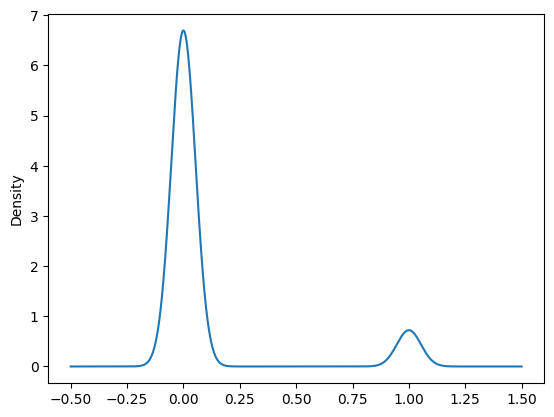

In [29]:
df['hypertension'].plot.density()


<Axes: ylabel='Density'>

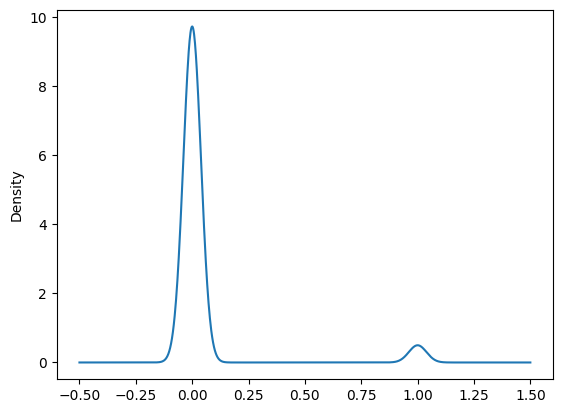

In [28]:
df['stroke'].plot.density()

<Axes: ylabel='Density'>

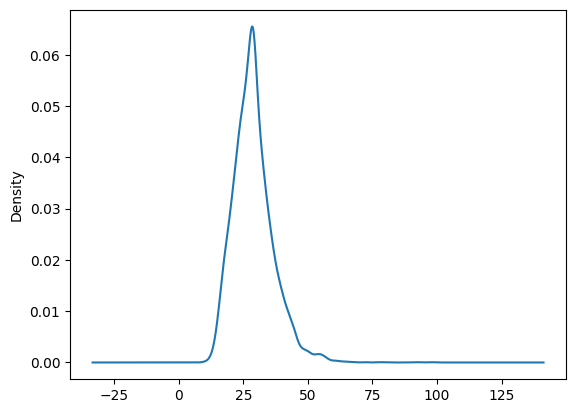

In [27]:
df['bmi'].plot.density()

<Axes: ylabel='Density'>

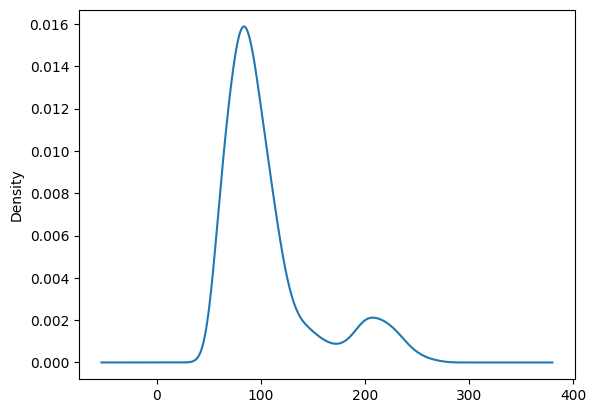

In [26]:
df['avg_glucose_level'].plot.density()

<Axes: ylabel='Density'>

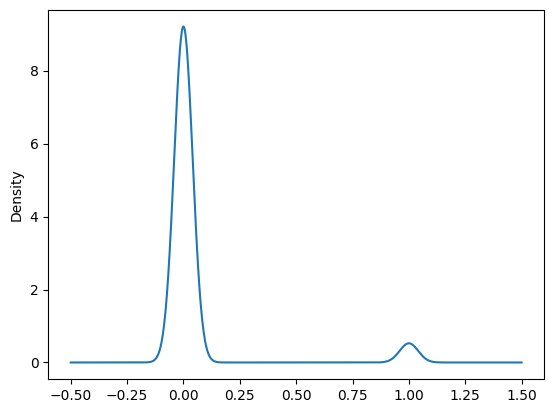

In [25]:
df['heart_disease'].plot.density()